In [1]:
% pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from __future__ import print_function
import os.path
import pandas
import src
import sklearn
import os
import scipy
import scipy.stats

In [3]:
def fake(*args, **kwargs):
    print('Fake called with', str(args), str(kwargs))
    sys.exit(1)

# fake out the create_model so we don't accidentally attempt to create data
src.common.create_model = fake

In [4]:
# import seaborn
# seaborn.set_palette("colorblind")

In [5]:
print(os.getcwd())
if os.getcwd().endswith('notebooks'):
    os.chdir('..')
print(os.getcwd())

/home/cscorley/git/triage/notebooks
/home/cscorley/git/triage


In [6]:
args = dict(level='file', force=False, model='lda', source=['release', 'changeset', 'temporal'], random_seed_value=1)

model_config, model_config_string = src.main.get_default_model_config(args)
args.update({'model_config': model_config, 'model_config_string': model_config_string})

changeset_config, changeset_config_string = src.main.get_default_changeset_config()
args.update({'changeset_config': changeset_config, 'changeset_config_string': changeset_config_string})

projects = src.common.load_projects(args)
projects

[Project(name='tika', printable_name='Tika v1.8', version='v1.8', ref='refs/tags/1.8', data_path='data/tika/', full_path='data/tika/v1.8/', src_path='data/tika/v1.8/src/', changeset_config_string=u'True-True-False-True', source=['release', 'changeset', 'temporal'], model_config_string=u'seed1-batch-0.002-0.5-0.002-1000-1000-500-1.0-1', force=False, level='file', model_config={'passes': 1, 'eta': 0.002, 'num_topics': 500, 'iterations': 1000, 'decay': 0.5, 'algorithm': 'batch', 'alpha': 0.002, 'offset': 1.0, 'max_bound_iterations': 1000}, model='lda', random_seed_value=1, changeset_config={'include_removals': True, 'include_context': True, 'include_message': False, 'include_additions': True}),
 Project(name='pig', printable_name='Pig v0.14.0', version='v0.14.0', ref='refs/tags/release-0.14.0', data_path='data/pig/', full_path='data/pig/v0.14.0/', src_path='data/pig/v0.14.0/src/', changeset_config_string=u'True-True-False-True', source=['release', 'changeset', 'temporal'], model_config_st

In [7]:
data = dict()
csvs = dict()
for project in projects:
    ownership = src.ownership.read_ownership(project)
    devs = set()
    for v in ownership.values():
        devs.update(v.keys())
        
    goldsets = pandas.read_csv(os.path.join(project.full_path, 'goldset-info.csv'))
    changes = pandas.read_csv(os.path.join(project.full_path, 'changeset-info.csv'))
    release = pandas.read_csv(os.path.join(project.full_path, 'releasefile-info.csv'))
    queries = pandas.read_csv(os.path.join(project.full_path, 'queries-info.csv'))
    info = {"Developers": len(devs), "Changesets": len(changes), "Files": len(release), "Issues": len(queries)}
    data[project.printable_name] = info
    
    csvs[project.name] = {'g': goldsets, 'c': changes, 'r': release, 'q': queries, 'd': devs, 'o': ownership}


df = pandas.DataFrame(data)
df['Total'] = df.T.sum()
df.T

,Changesets,Developers,Files,Issues
BookKeeper v4.3.0,574,5,843,164
Mahout v0.10.0,3283,38,1556,133
OpenJPA v2.3.0,4616,26,4968,137
Pig v0.14.0,2584,28,2098,222
Tika v1.8,2469,26,954,40
ZooKeeper v3.5.0,1245,16,927,359
Total,14771,139,11346,1055


In [8]:
with open(os.path.expanduser('~/git/dissertation/tables/subjects.tex'), 'w') as f:
    header = ["\\begin{table}",
              "\\centering",
              "\\caption{Subject system corpora and dataset sizes}",
              "\\label{table:subjects}"]
    f.write('\n'.join(header) + '\n')
    latex = df.T.to_latex(columns=["Developers", "Files", "Changesets", "Issues"]).splitlines()
    latex.insert(-3, '\\midrule')
    f.write('\n'.join(latex))
    f.write("\n\\end{table}\n")

In [9]:
for project in projects:
    print(project.name, 'q total ',  csvs[project.name]['q'].total_words.sum() / len(csvs[project.name]['q']))
    print(project.name, 'q unique', csvs[project.name]['q'].unique_words.sum() / len(csvs[project.name]['q']))
    print()
    print(project.name, 'c total ',  csvs[project.name]['c'].total_words.sum() / len(csvs[project.name]['c']))
    print(project.name, 'c unique', csvs[project.name]['c'].unique_words.sum() / len(csvs[project.name]['c']))
    print()
    print(project.name, 'r total ',  csvs[project.name]['r'].total_words.sum() / len(csvs[project.name]['r']))
    print(project.name, 'r unique', csvs[project.name]['r'].unique_words.sum() / len(csvs[project.name]['r']))
    print('********************')

tika q total  72
tika q unique 35

tika c total  900
tika c unique 130

tika r total  658
tika r unique 187
********************
pig q total  79
pig q unique 28

pig c total  3785
pig c unique 159

pig r total  746
pig r unique 117
********************
bookkeeper q total  42
bookkeeper q unique 21

bookkeeper c total  4127
bookkeeper c unique 206

bookkeeper r total  663
bookkeeper r unique 122
********************
openjpa q total  113
openjpa q unique 41

openjpa c total  1567
openjpa c unique 102

openjpa r total  402
openjpa r unique 96
********************
mahout q total  54
mahout q unique 28

mahout c total  2502
mahout c unique 142

mahout r total  614
mahout r unique 114
********************
zookeeper q total  79
zookeeper q unique 33

zookeeper c total  2258
zookeeper c unique 287

zookeeper r total  622
zookeeper r unique 139
********************


In [10]:
pigo = pandas.DataFrame(csvs['pig']['o'])
jpao = pandas.DataFrame(csvs['openjpa']['o'])
booko = pandas.DataFrame(csvs['bookkeeper']['o'])

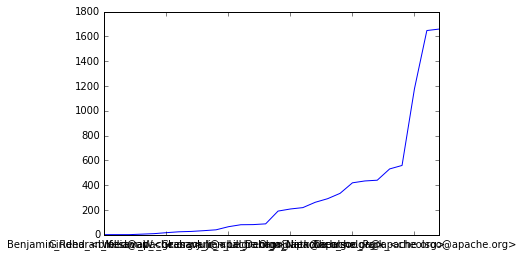

In [11]:
pigo.T.describe().T.sort("count")["count"].plot()

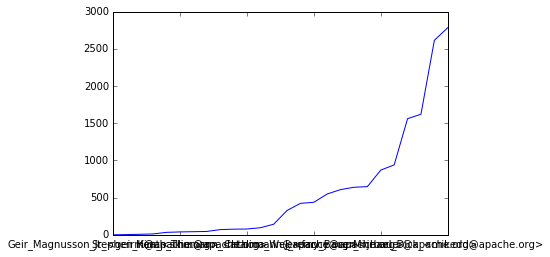

In [12]:
jpao.T.describe().T.sort("count")["count"].plot()

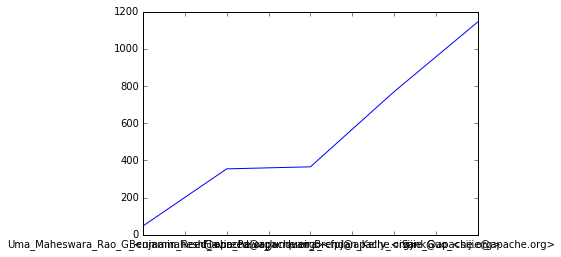

In [13]:
booko.T.describe().T.sort("count")["count"].plot()

In [14]:
def plot_ownership(data):
    m = dict()
    for each in data:
        z = data[each].argmax()
        if z not in m:
            m[z] = list()
        m[z].append(each)

    zz = pandas.Series([len(v) for v in m.values()], index=[k for k in m])
    zz.sort()
    zz.plot()
    return zz


Uma_Maheswara_Rao_G_<umamahesh@apache.org>    0.000552
Flavio_Paiva_Junqueira_<fpj@apache.org>       0.082320
Benjamin_Reed_<breed@apache.org>              0.093370
Ivan_Brendan_Kelly_<ivank@apache.org>         0.333149
Sijie_Guo_<sijie@apache.org>                  0.490608
dtype: float64

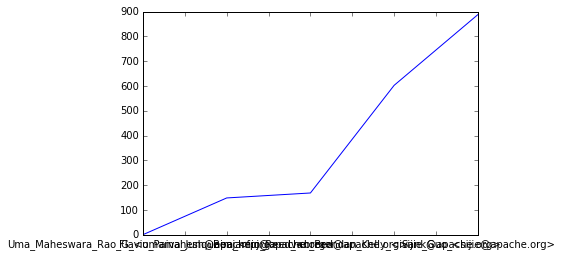

In [15]:
zz = plot_ownership(booko)
zz / zz.sum()

Jeff_Zhang_<zjffdu@apache.org>                      0.000293
Giridharan_Kesavan_<gkesavan@apache.org>            0.000586
Raghu_Angadi_<rangadi@apache.org>                   0.000586
Prashant_Kommireddi_<prkommireddi@apache.org>       0.000586
Koji_Noguchi_<knoguchi@apache.org>                  0.000879
Gianmarco_De_Francisci_Morales_<gdfm@apache.org>    0.000879
Xuefu_Zhang_<xuefu@apache.org>                      0.000879
Ashutosh_Chauhan_<hashutosh@apache.org>             0.001758
William_W._Graham_Jr_<billgraham@apache.org>        0.003223
Aniket_Namadeo_Mokashi_<aniket486@apache.org>       0.004981
Julien_Le_Dem_<julien@apache.org>                   0.005860
Jonathan_Coveney_<jcoveney@apache.org>              0.007618
Richard_Ding_<rding@apache.org>                     0.012892
Santhosh_Muthur_Srinivasan_<sms@apache.org>         0.016994
Pradeep_Kamath_<pradeepkth@apache.org>              0.019045
Yan_Zhou_<yanz@apache.org>                          0.024319
Dmitriy_V._Ryaboy_<dvrya

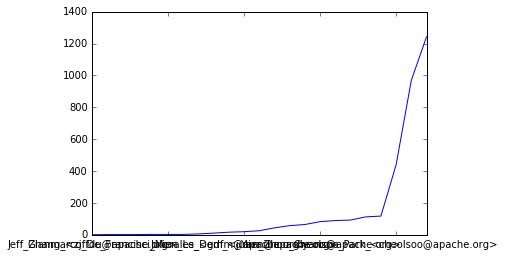

In [16]:
zz = plot_ownership(pigo)
zz / zz.sum()

Tim_McConnell_<mcconne@apache.org>          0.000160
Stephen_Kim_<skim@apache.org>               0.000160
Geir_Magnusson_Jr_<geirm@apache.org>        0.000160
Craig_Russell_<clr@apache.org>              0.001602
Jody_Grassel_<jgrassel@apache.org>          0.001762
Milosz_Tylenda_<mtylenda@apache.org>        0.002563
David_Ezzio_<dezzio@apache.org>             0.002723
Heath_Thomann_<hthomann@apache.org>         0.004486
David_J._Wisneski_<wisneskid@apache.org>    0.004646
Dianne_E._Richards_<dianner@apache.org>     0.006248
Kevin_W._Sutter_<kwsutter@apache.org>       0.008010
Mark_Struberg_<struberg@apache.org>         0.019225
Richard_G._Curtis_<curtisr7@apache.org>     0.021628
A._Abram_White_<awhite@apache.org>          0.026113
Albert_Lee_<allee8285@apache.org>           0.029157
Catalina_Wei_<fancy@apache.org>             0.036687
Fay_Wang_<faywang@apache.org>               0.048542
Marc_Prud'hommeaux_<mprudhom@apache.org>    0.069369
Jeremy_Bauer_<jrbauer@apache.org>           0.

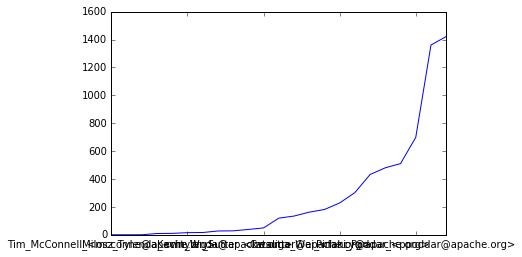

In [17]:
zz = plot_ownership(jpao)
zz / zz.sum()

# Data read

In [18]:
ALL_ORDER = ["Snapshot", "Changesets", "Historical"]
RQ1_ORDER = ["Snapshot", "Changesets"]
RQ2_ORDER = ["Changesets", "Historical"]

In [64]:
def get_panel(projects, fn):
    datarank = dict()
    for project in projects:
        results = fn(project) 
        x, y = src.common.merge_first_rels(results['changeset'], results['release'], ignore=True)
        _, z = src.common.merge_first_rels(results['changeset'], results['temporal'], ignore=True)
        print(len(x), len(y), len(z))
        datarank[project.printable_name] = {'Changesets': pandas.Series(x),
                                            'Snapshot': pandas.Series(y),
                                            'Historical': pandas.Series(z)}

    return pandas.Panel(datarank)

In [66]:
tpanel = get_panel(projects, src.triage.run_experiment)

40 40 39
222 222 221
164 164 163
137 137 136
133 133 130
359 359 354


In [21]:
fpanel = get_panel(projects, src.feature_location.run_experiment)

36 36 36
174 174 174
143 143 143
131 131 131
50 50 50
241 241 241


In [22]:
FIG_TEX="""
\\begin{figure}
    \\centering
    \\begin{subfigure}{.4\\textwidth}
        \\centering
        \\includegraphics[height=0.4\\textheight]{%s}
        \\caption{Including outliers}\\label{fig:%s_outlier}
    \\end{subfigure}%%
    \\begin{subfigure}{.4\\textwidth}
        \\centering
        \\includegraphics[height=0.4\\textheight]{%s_no_outlier}
        \\caption{Excluding outliers}\\label{fig:%s_no_outlier}
    \\end{subfigure}
\\caption{%s: %s effectiveness measures for %s}
\\label{fig:%s}
\\end{figure}
"""

def plot_panel(panel, order, name, kind):
    limitgrowth = 0.5
    size = (len(order)*1.6, 4.5)
    fontsize = None
    widths = 0.3
    kinds = {"flt": "Feature Location", "dit": "Developer Identification"}
    rqs = {"flt": {"rq1": "\\fone", "rq2": "\\ftwo", "all": "Overview"}, "dit": {"rq1": "\\done", "rq2": "\\dtwo", "all": "Overview"}}


    allt = pandas.DataFrame()
    for each in panel:
        allt = allt.append(panel[each], ignore_index=True)

        result = panel[each].plot(kind='box',
                         fontsize=fontsize,
                         figsize=size,
                         widths=widths,
                         y=order)
        limit = result.get_ylim()
        lower = limit[0] - limitgrowth
        if (lower < 0):
            lower = 0
        result.set_ylim(lower, limit[1] + limitgrowth)
        #plt.gca().invert_yaxis()
        plt.tight_layout()
        short_each = each.lower().split(' ')[0]
        fig_name = 'figures/%s/%s_%s' % (kind, name, short_each)
        path = os.path.expanduser('~/git/dissertation/') + fig_name
        plt.savefig(path + ".pdf", dpi=300)
        
        with open(path + ".tex", "wt") as f:
            figlabel = ":".join([x.lower() for x in [kind, name, short_each]])
            f.write(FIG_TEX % (fig_name, figlabel,
                               fig_name, figlabel,
                               rqs[kind][name], kinds[kind], each, figlabel))
            
        result = panel[each].plot(kind='box',
                         fontsize=fontsize,
                         figsize=size,
                         widths=widths,
                         y=order,
                         showfliers=False)
        limit = result.get_ylim()
        lower = limit[0] - limitgrowth
        if (lower < 0):
            lower = 0
        result.set_ylim(lower, limit[1] + limitgrowth)
        
        #plt.gca().invert_yaxis()
        plt.tight_layout()
        fig_name = 'figures/%s/%s_%s_no_outlier' % (kind, name, short_each)
        path = os.path.expanduser('~/git/dissertation/') + fig_name
        plt.savefig(path + ".pdf", dpi=300)
        
    allt.plot(kind='box', figsize=(4,1.5), grid=False, vert=False, y=list(reversed(order)))
    plt.tight_layout()
    short_each = "tiny"
    fig_name = 'figures/%s/%s_%s' % (kind, name, short_each)
    path = os.path.expanduser('~/git/dissertation/') + fig_name
    plt.savefig(path + ".pdf", dpi=300)

    with open(path + ".tex", "wt") as f:
        figlabel = ":".join([x.lower() for x in [kind, name, short_each]])
        f.write(FIG_TEX % (fig_name, figlabel,
                           fig_name, figlabel,
                           rqs[kind][name], kinds[kind], "all subject systems", figlabel))
    
    result = allt.plot(kind='box',
              fontsize=fontsize,
              figsize=size,
              widths=widths,
              y=order)
    limit = result.get_ylim()
    lower = limit[0] - limitgrowth
    if (lower < 0):
        lower = 0
    result.set_ylim(lower, limit[1] + limitgrowth)
    #plt.gca().invert_yaxis()
    plt.tight_layout()
    short_each = "overview"
    fig_name = 'figures/%s/%s_%s' % (kind, name, short_each)
    path = os.path.expanduser('~/git/dissertation/') + fig_name
    plt.savefig(path + ".pdf", dpi=300)
    with open(path + ".tex", "wt") as f:
        figlabel = ":".join([x.lower() for x in [kind, name, short_each]])
        f.write(FIG_TEX % (fig_name, figlabel,
                           fig_name, figlabel,
                           rqs[kind][name], kinds[kind], "all subject systems", figlabel))
        
    
    result = allt.plot(kind='box',
              fontsize=fontsize,
              figsize=size,
              widths=widths,
              y=order,
              showfliers=False)
    limit = result.get_ylim()
    lower = limit[0] - limitgrowth
    if (lower < 0):
        lower = 0
    result.set_ylim(lower, limit[1] + limitgrowth)
    #plt.gca().invert_yaxis()
    plt.tight_layout()
    short_each = "overview"
    fig_name = 'figures/%s/%s_%s_no_outlier' % (kind, name, short_each)
    path = os.path.expanduser('~/git/dissertation/') + fig_name
    plt.savefig(path + ".pdf", dpi=300)

# Triage

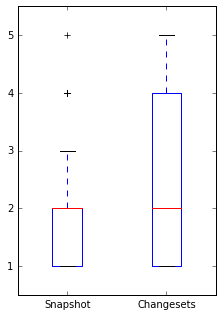

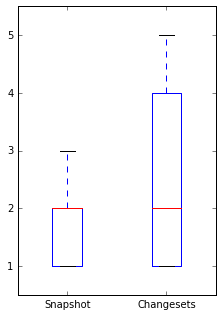

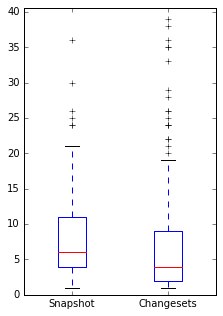

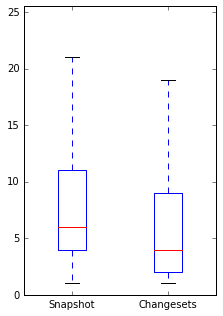

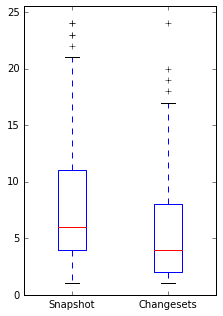

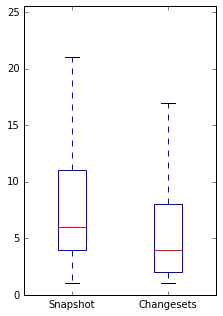

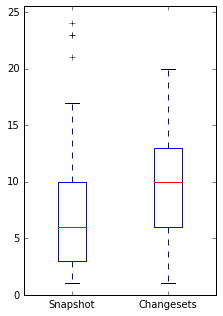

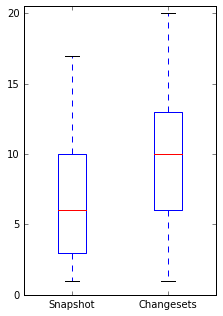

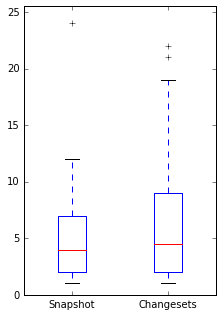

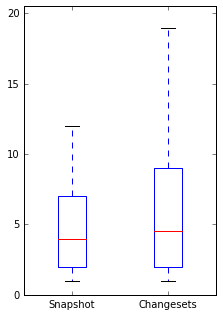

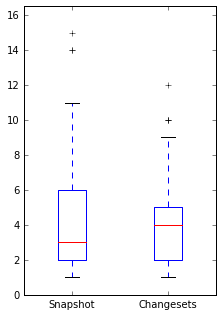

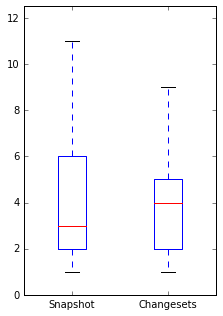

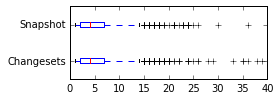

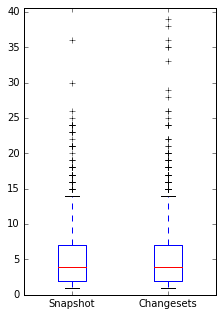

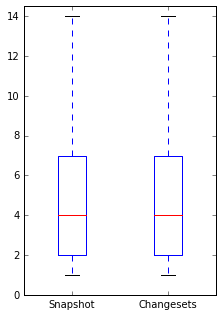

In [23]:
plot_panel(tpanel, RQ1_ORDER, "rq1", "dit")

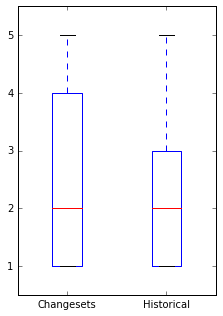

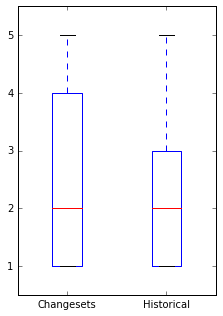

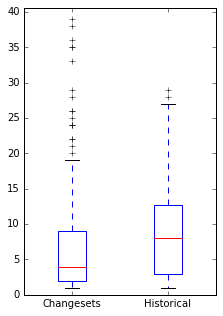

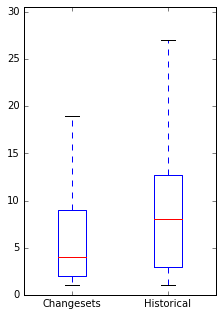

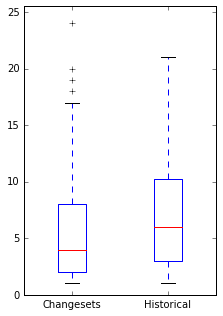

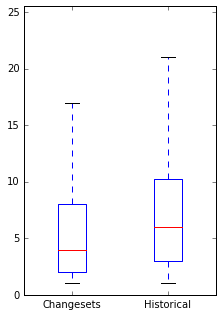

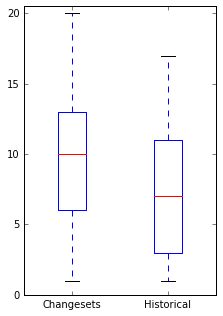

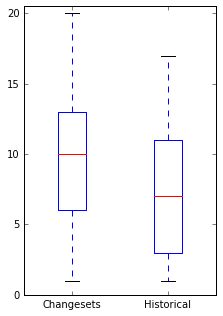

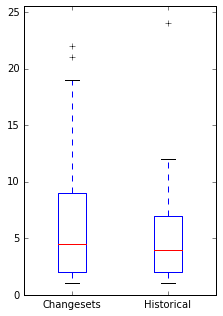

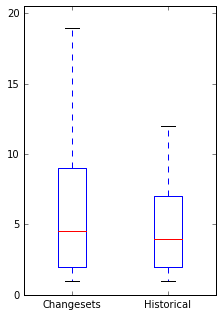

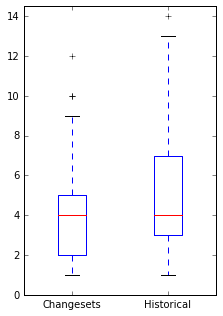

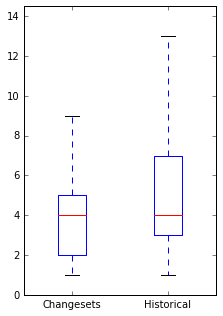

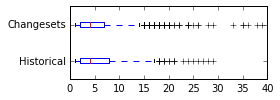

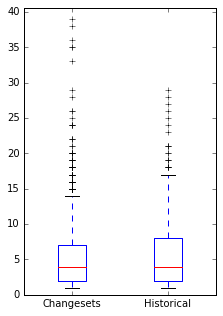

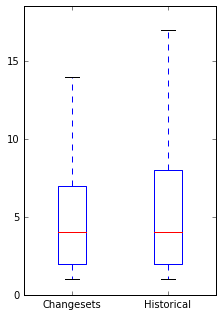

In [24]:
plot_panel(tpanel, RQ2_ORDER, "rq2", "dit")

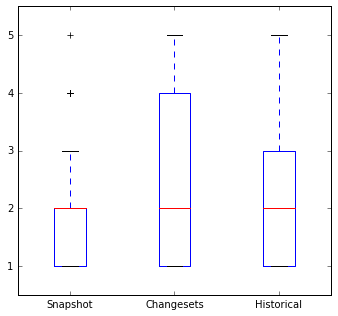

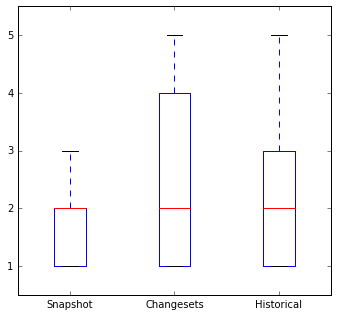

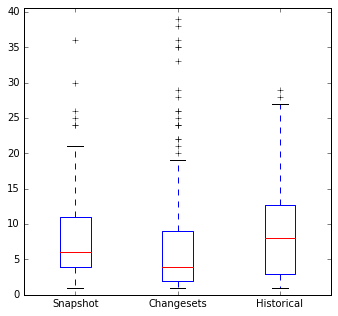

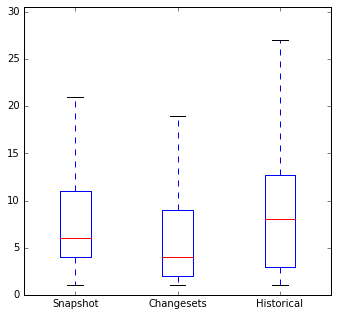

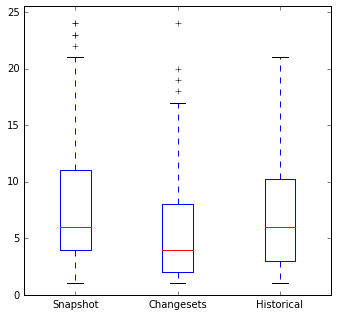

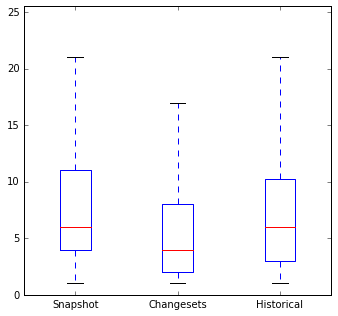

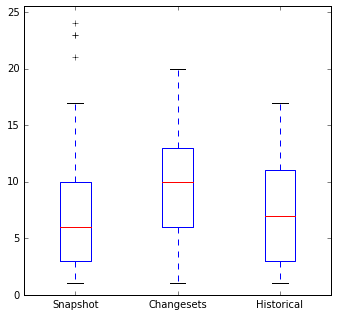

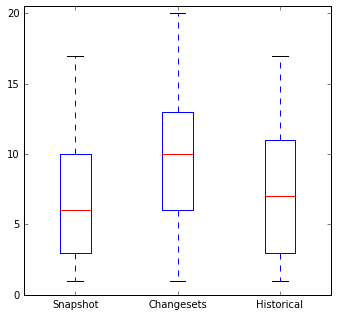

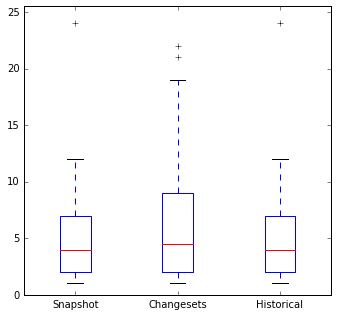

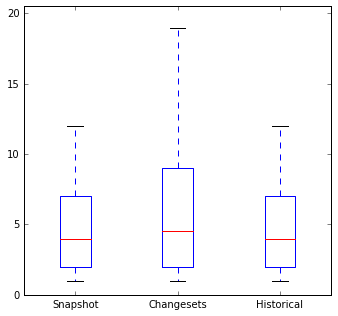

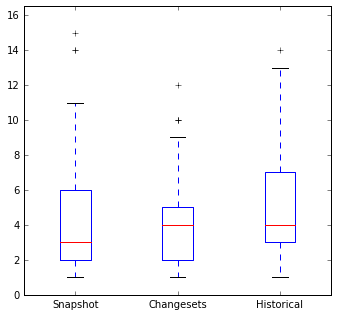

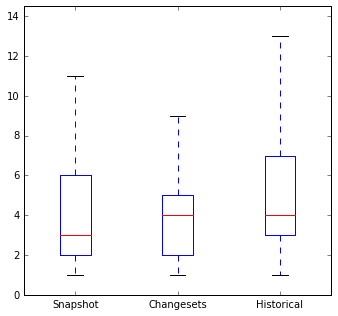

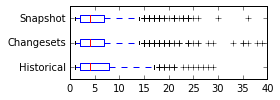

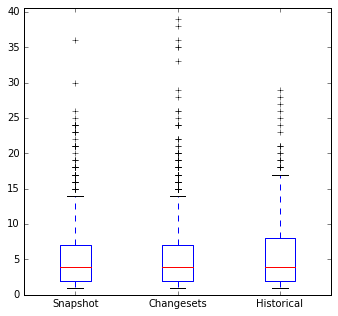

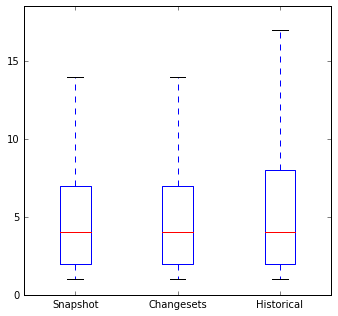

In [25]:
plot_panel(tpanel, ALL_ORDER, "all", "dit")

# Feature loc

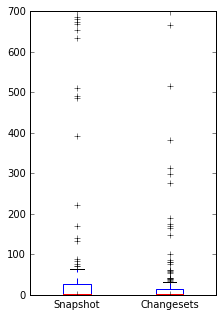

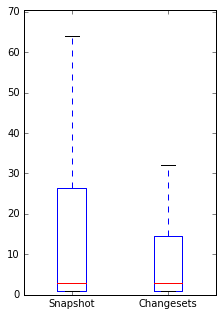

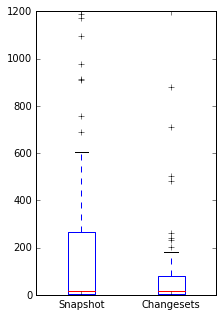

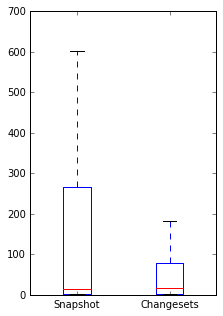

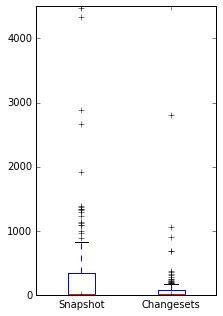

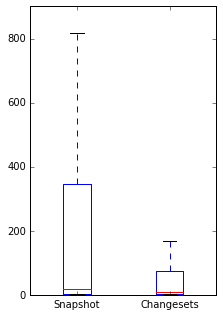

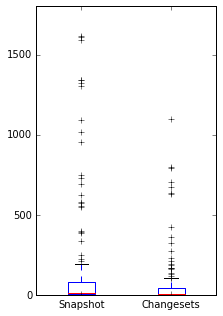

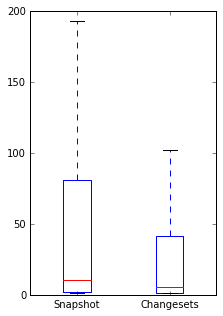

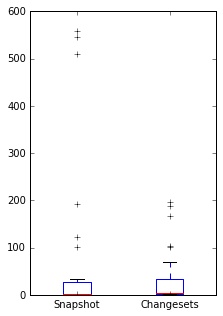

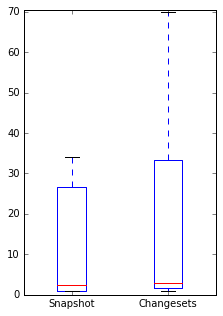

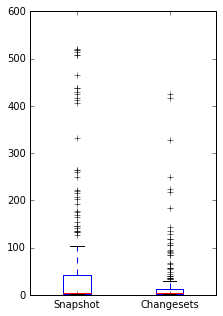

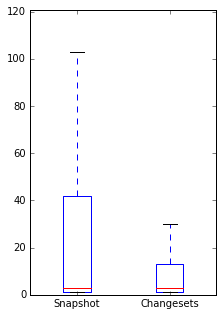

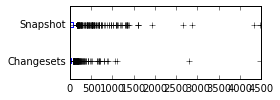

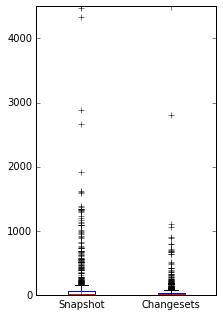

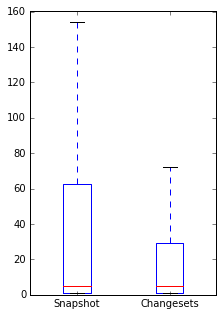

In [26]:
plot_panel(fpanel, RQ1_ORDER, "rq1", "flt")

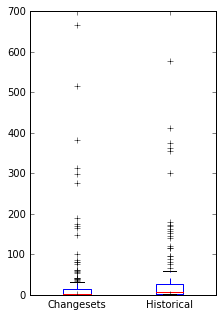

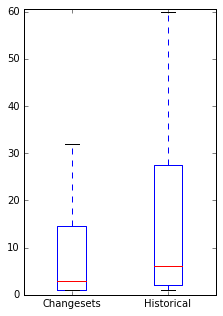

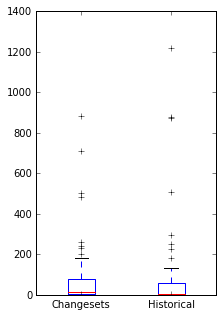

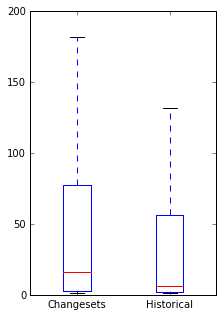

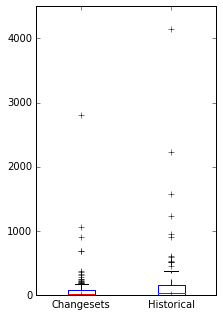

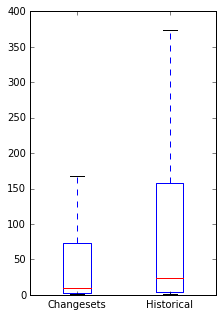

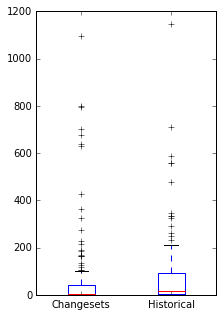

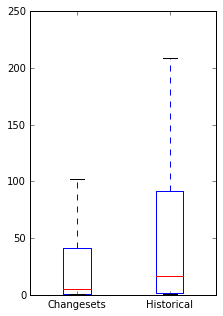

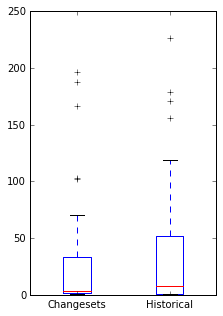

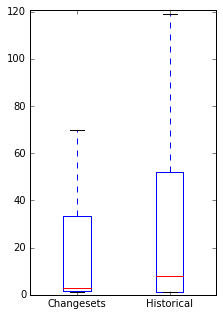

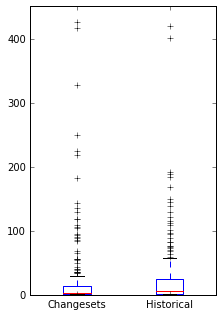

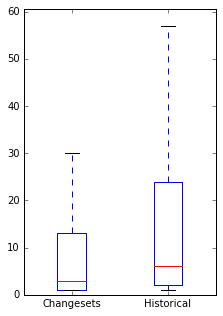

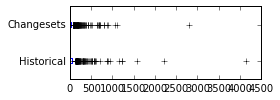

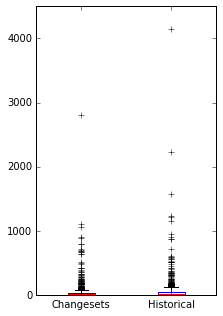

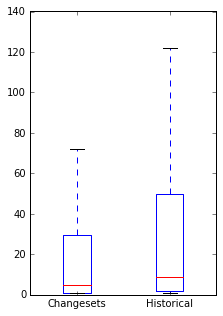

In [27]:
plot_panel(fpanel, RQ2_ORDER, "rq2", "flt")

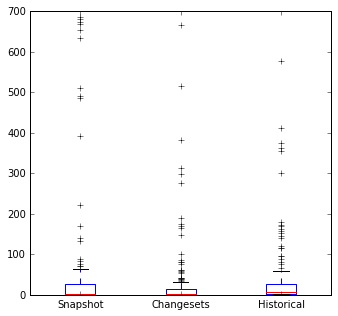

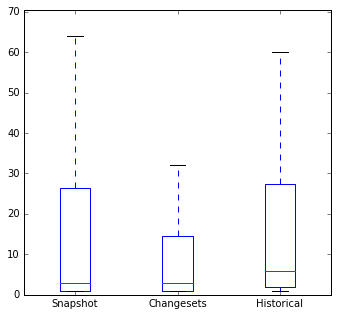

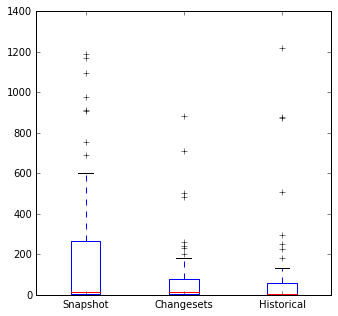

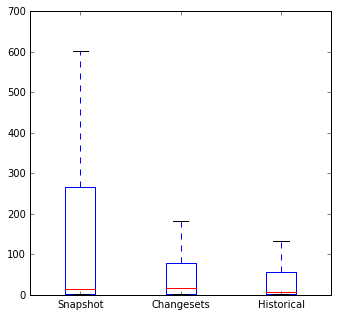

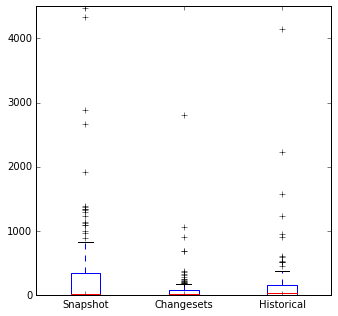

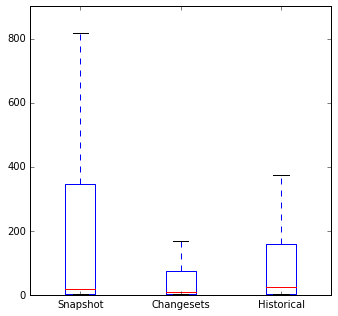

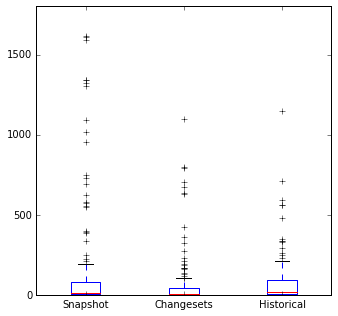

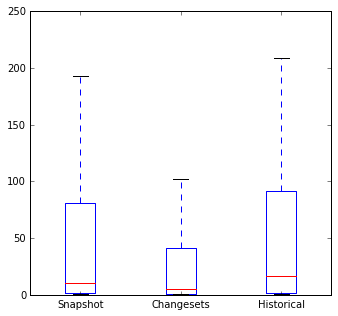

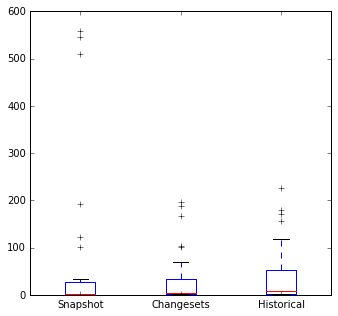

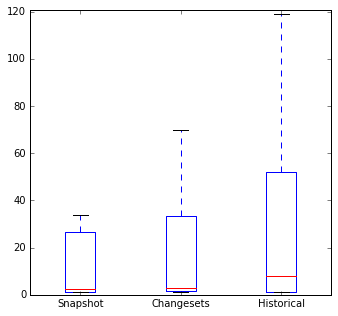

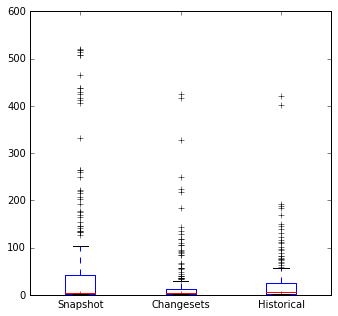

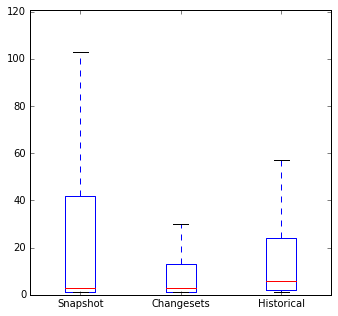

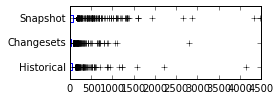

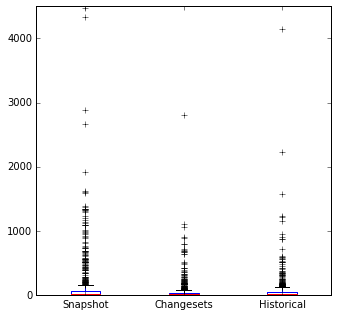

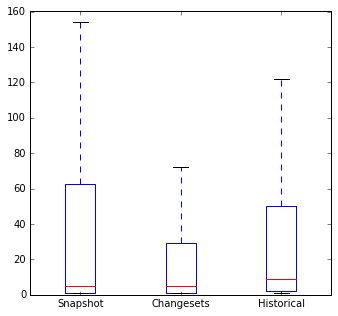

In [28]:
plot_panel(fpanel, ALL_ORDER, "all", "flt")

In [61]:
b = tpanel['BookKeeper v4.3.0'].dropna(how='all')
c = b[pandas.isnull(b).any(axis=1)]

In [62]:
c

,Changesets,Historical,Snapshot
163,1,NaN,2


In [105]:
projects[4]

Project(name='mahout', printable_name='Mahout v0.10.0', version='v0.10.0', ref='refs/tags/mahout-0.10', data_path='data/mahout/', full_path='data/mahout/v0.10.0/', src_path='data/mahout/v0.10.0/src/', changeset_config_string=u'True-True-False-True', source=['release', 'changeset', 'temporal'], model_config_string=u'seed1-batch-0.002-0.5-0.002-1000-1000-500-1.0-1', force=False, level='file', model_config={'passes': 1, 'eta': 0.002, 'num_topics': 500, 'iterations': 1000, 'decay': 0.5, 'algorithm': 'batch', 'alpha': 0.002, 'offset': 1.0, 'max_bound_iterations': 1000}, model='lda', random_seed_value=1, changeset_config={'include_removals': True, 'include_context': True, 'include_message': False, 'include_additions': True})

In [106]:
set([y for x,y,z in src.triage.run_experiment(projects[4])['changeset']]) - set([y for x,y,z in src.triage.run_experiment(projects[4])['temporal']]) 

{'1554', '1565', '1616'}

# failure analysis

## mahout

{'1554', '1565', '1616'}


### First commit(s) by author

1554, 1565, 1616

### Interesting 

1565 author, gcapan, was first commit under that email (apache offical), but author has many emails in this project:

    u'Gokhan_<gkhncpn@gmail.com>',
    u'Gokhan_Capan_<gcapan@apache.org>',
    u'gcapan_<gcapan@anadolu.edu.tr>',
    u'gcapan_<gcapan@unknown>',
    
1616 was same author, but gmail email.

In [107]:
csvs['mahout']['d']

{u'Abdel_Hakim_Deneche_<adeneche@apache.org>',
 u'Andrew_L._Farris_<drew@apache.org>',
 u'Andrew_Musselman_<akm@apache.org>',
 u'Andrew_Musselman_<andrew.musselman@accenture.com>',
 u'Andrew_Palumbo_<ap.dev@outlook.com>',
 u'Andrew_Palumbo_<apalumbo@apache.org>',
 u'Benson_Margulies_<bimargulies@apache.org>',
 u'David_Leo_Wright_Hall_<dlwh@apache.org>',
 u'Dawid_Weiss_<dweiss@apache.org>',
 u'Dmitriy_Lyubimov_<dlyubimov@apache.org>',
 u'Gokhan_<gkhncpn@gmail.com>',
 u'Gokhan_Capan_<gcapan@apache.org>',
 u'Grant_Ingersoll_<gsingers@apache.org>',
 u'Isabel_Drost_<isabel@apache.org>',
 u'Jacob_Alexander_Mannix_<jmannix@apache.org>',
 u'Jeff_Eastman_<jeastman@apache.org>',
 u'Karl-Johan_Wettin_<kalle@apache.org>',
 u'Otis_Gospodnetic_<otis@apache.org>',
 u'Robin_Anil_<robinanil@apache.org>',
 u'Sean_Owen_<srowen@gmail.com>',
 u'Sean_R._Owen_<srowen@apache.org>',
 u'Sebastian_Schelter_<ssc@apache.org>',
 u'Shannon_Quinn_<squinn@apache.org>',
 u'Stevo_Slavic_<sslavic@gmail.com>',
 u'Suneel_M

## OpenJPA

{'2282'}

### First commit(s) by author

2282

In [104]:
csvs['openjpa']['d']

{u'A._Abram_White_<awhite@apache.org>',
 u'Albert_Lee_<allee8285@apache.org>',
 u'Catalina_Wei_<fancy@apache.org>',
 u'Craig_Russell_<clr@apache.org>',
 u'David_Ezzio_<dezzio@apache.org>',
 u'David_J._Wisneski_<wisneskid@apache.org>',
 u'Dianne_E._Richards_<dianner@apache.org>',
 u'Donald_Woods_<dwoods@apache.org>',
 u'Fay_Wang_<faywang@apache.org>',
 u'Geir_Magnusson_Jr_<geirm@apache.org>',
 u'Heath_Thomann_<hthomann@apache.org>',
 u'Helen_Xu_<helenxu@apache.org>',
 u'Jeremy_Bauer_<jrbauer@apache.org>',
 u'Jody_Grassel_<jgrassel@apache.org>',
 u'Kevin_W._Sutter_<kwsutter@apache.org>',
 u"Marc_Prud'hommeaux_<mprudhom@apache.org>",
 u'Mark_Struberg_<struberg@apache.org>',
 u'Michael_Dick_<mikedd@apache.org>',
 u'Milosz_Tylenda_<mtylenda@apache.org>',
 u'Patrick_Linskey_<pcl@apache.org>',
 u'Pinaki_Poddar_<ppoddar@apache.org>',
 u'Ravi_Prakash_Palacherla_<rpalache@apache.org>',
 u'Richard_G._Curtis_<curtisr7@apache.org>',
 u'Srinivasa_Segu_<ssegu@apache.org>',
 u'Stephen_Kim_<skim@apache

## Bookkeeper 

{'561'}

### First commit(s) by author

561

In [97]:
csvs['bookkeeper']['d']

{u'Benjamin_Reed_<breed@apache.org>',
 u'Flavio_Paiva_Junqueira_<fpj@apache.org>',
 u'Ivan_Brendan_Kelly_<ivank@apache.org>',
 u'Sijie_Guo_<sijie@apache.org>',
 u'Uma_Maheswara_Rao_G_<umamahesh@apache.org>'}

## Pig

{'4127'}

### First commit(s) by author

4127

In [98]:
csvs['pig']['d']

{u'Alan_Gates_<gates@apache.org>',
 u'Aniket_Namadeo_Mokashi_<aniket486@apache.org>',
 u'Ashutosh_Chauhan_<hashutosh@apache.org>',
 u'Benjamin_Reed_<breed@apache.org>',
 u'Cheolsoo_Park_<cheolsoo@apache.org>',
 u'Cheolsoo_Park_<cheolsoo@apache.org_=__cheolsoo_=_Cheolsoo_Park_cheolsoo@apache.org@apache.org>',
 u'Dmitriy_V._Ryaboy_<dvryaboy@apache.org>',
 u'Gianmarco_De_Francisci_Morales_<gdfm@apache.org>',
 u'Giridharan_Kesavan_<gkesavan@apache.org>',
 u'Jeff_Zhang_<zjffdu@apache.org>',
 u'Jianyong_Dai_<daijy@apache.org>',
 u'Jianyong_Dai_<daijy@apache.org_=__daijy_=_Jianyong_Dai_daijy@apache.org@apache.org>',
 u'Jonathan_Coveney_<jcoveney@apache.org>',
 u'Julien_Le_Dem_<julien@apache.org>',
 u'Koji_Noguchi_<knoguchi@apache.org>',
 u'Lorand_Bendig_<lbendig@apache.org>',
 u'Olga_Natkovich_<olga@apache.org>',
 u'Pradeep_Kamath_<pradeepkth@apache.org>',
 u'Prashant_Kommireddi_<prkommireddi@apache.org>',
 u'Raghu_Angadi_<rangadi@apache.org>',
 u'Richard_Ding_<rding@apache.org>',
 u'Rohini_P

## Tika

{'1575'}

### First commit(s) by author



### Interesting

#### Wierd committer name (duplicate author address linking problem?)

1575,

Has both a weird committer name AND is the first commit from this author


    commit bea95ec81acdd04bada5651d37e0e605ed4f8222
    Author: grossws <grossws@unknown>
    Date:   Sun Mar 29 14:33:46 2015 +0000

        Update pdfbox to 1.8.9

        Fixes TIKA-1575

        git-svn-id: https://svn.apache.org/repos/asf/tika/trunk@1669912 13f79535-47bb-0310-9956-ffa450edef68
        

most recent commit
        
    commit ab1158a238571382da0a7ea72aca6eeca8552535
    Author: Konstantin Gribov <grossws@apache.org>
    Date:   Tue Jul 28 13:00:16 2015 +0000

        Remove junit from OSGi bundle deps

        Test dependencies removed from OSGi bundle `Import-Package` manifest header.

        Extra integration test by Bob Pailin <bob@apache.org> added to avoid regressions
        with junit packages included to inappropriate manifest entries.

        Fixes TIKA-1524

        git-svn-id: https://svn.apache.org/repos/asf/tika/trunk@1693089 13f79535-47bb-0310-9956-ffa450edef68




In [99]:
csvs['tika']['d']

{u'Ann_Bryant_Burgess_<aburgess@apache.org>',
 u'Antoni_Mylka_<amylka@apache.org>',
 u'Bertrand_Delacretaz_<bdelacretaz@apache.org>',
 u'Chris_Mattmann_<mattmann@apache.org>',
 u'David_Meikle_<dmeikle@apache.org>',
 u'Hong-Thai_Nguyen_<thaichat04@apache.org>',
 u'Jukka_Lauri_Zitting_<jukka@apache.org>',
 u'Jukka_Zitting_<jukka@apache.org>',
 u'Julien_Nioche_<jnioche@apache.org>',
 u'Keith_Bennett_<kbennett@apache.org>',
 u'Kenneth_William_Krugler_<kkrugler@apache.org>',
 u'Konstantin_Gribov_<grossws@apache.org>',
 u'Lewis_John_McGibbney_<lewismc@apache.org>',
 u'Maxim_Valyanskiy_<maxcom@apache.org>',
 u'Michael_McCandless_<mikemccand@apache.org>',
 u'Nick_Burch_<nick@apache.org>',
 u'Nick_Burch_<nick@apache.org_=__nick_=_Nick_Burch_nick@apache.org@apache.org>',
 u'Oleg_Tikhonov_<oleg@apache.org>',
 u'Ray_Gauss_II_<rgauss@apache.org>',
 u'Rida_Benjelloun_<ridabenjelloun@apache.org>',
 u'Sami_Siren_<siren@apache.org>',
 u'Sergey_Beryozkin_<sergeyb@apache.org>',
 u'Tim_Allison_<tallison@a

## Zookeeper

{'1357', '1413', '1695', '1900', '1909'}

### First commit(s) by author

1413, 1695, 1900, 1909

### Interesting

#### Wierd committer name (duplicate author address linking problem?)

Wierd email?  Would have been first & only commit, hence it was not located.

1357

    

    commit 03218f40e396949fe007c276ba837ec78a3de2a1
    Author: Michi Mutsuzaki <michim@apache.org>
    Date:   Wed Apr 16 06:15:28 2014 +0000

        ZOOKEEPER-1887. C implementation of removeWatches (Raul Gutierrez Segales via michim)


        git-svn-id: https://svn.apache.org/repos/asf/zookeeper/trunk@1587812 13f79535-47bb-0310-9956-ffa450edef68

    commit 94880dd88002dc37deaedd72bb08fe9b705bcbe8
    Author: Michi Mutsuzaki <michim@apache.org =  michim = Michi Mutsuzaki michim@apache.org@apache.org>
    Date:   Mon Apr 14 21:51:55 2014 +0000

        ZOOKEEPER-1357. Zab1_0Test uses hard-wired port numbers. Specifically, it uses the same port for leader in two different tests. The second test periodically fails complaining that the port is still in use. (Alexander Shraer via michim)


        git-svn-id: https://svn.apache.org/repos/asf/zookeeper/trunk@1587335 13f79535-47bb-0310-9956-ffa450edef68

    commit 644542390d75af0b752ab34fde0ccbf995bb05cf
    Author: Michi Mutsuzaki <michim@apache.org>
    Date:   Thu Apr 10 03:20:17 2014 +0000

        zkEnv.cmd: Set svn:eol-style property to 'native'.


        git-svn-id: https://svn.apache.org/repos/asf/zookeeper/trunk@1586200 13f79535-47bb-0310-9956-ffa450edef68

1909

    commit 68fe08a80e0896967d536f87fffb0b7f89846b73
    Author: rakeshr <rakeshr@unknown>
    Date:   Thu Apr 17 06:47:18 2014 +0000

        ZOOKEEPER-1909. removeWatches doesn't return NOWATCHER when there is
        no watch set (Raul Gutierrez Segales via rakeshr)

        git-svn-id: https://svn.apache.org/repos/asf/zookeeper/trunk@1588141 13f79535-47bb-0310-9956-ffa450edef68


In [100]:
csvs['zookeeper']['d']

{u'Alexander_Shraer_<shralex@apache.org>',
 u'Andrew_Kornev_<akornev@apache.org>',
 u'Benjamin_Reed_<breed@apache.org>',
 u'Camille_Fournier_<camille@apache.org>',
 u'Flavio_Paiva_Junqueira_<fpj@apache.org>',
 u'Giridharan_Kesavan_<gkesavan@apache.org>',
 u'Henry_Robinson_<henry@apache.org>',
 u'Mahadev_Konar_<mahadev@apache.org>',
 u'Michi_Mutsuzaki_<michim@apache.org>',
 u'Michi_Mutsuzaki_<michim@apache.org_=__michim_=_Michi_Mutsuzaki_michim@apache.org@apache.org>',
 u'Nigel_Daley_<nigel@apache.org>',
 u'Patrick_D._Hunt_<phunt@apache.org>',
 u'Rakesh_Radhakrishnan_<rakeshr@apache.org>',
 u'Thawan_Kooburat_<thawan@apache.org>',
 u'mahadevkonar_<dev-null@apache.org>',
 u'rakeshr_<rakeshr@unknown>'}